# Tutorial 01: a single Spitzer spectrum

We begin this series by performing a simple analysis of a single astronomical spectrum. We will use one of the sample spectra here. Feel free to follow along, and attempt the same method with a simple spectrum of your own.

Data used in this example: `pyPAHdb/data/sample_data_NGC7023-NW-PAHs.txt`

# Table of contents
1. [Import needed modules](#step1)
2. [Prepare the data](#step2)
    1. [Load the spectrum](#step2a)
    2. [Make a quick plot](#step2b)    
3. [Running pyPAHdb -- short version](#step3)
    1. [Instantiate an observation object](#step3a)
    2. [Pass the spectrum to decomposer](#step3b)
    3. [Write the results to disk](#step3c)
4. [Running pyPAHdb -- long version](#step4)

***

## <font color=blue>Step 1</font>: Necessary modules <a name="step1"></a>

In [35]:
# The below command will suppress the shell output, since we are using
# matplotlib within a notebook.
%matplotlib inline

import os
import pkg_resources

import matplotlib.pyplot as plt
import numpy as np
import pandas

import pypahdb

## <font color=blue>Step 2</font>: Data preparation <a name="step2"></a>

You should ensure your data has a simple format. Acceptable formats include:

- FITS
    - ...
    
- ASCII
    - either two-column (wavelength, flux) or three-column (wavelength, flux, flux error)
    - seperated by commas (CSV) or single spaces

### Load the spectrum <a name="step2a"></a>

We will use the example spectrum ``sample_data_NGC7023-NW-PAHs.txt``, included in the pypahdb distribution.

In [37]:
# Loading from the data directory. For your uses, point to the location
# of the spectrum you are examining.
# data_file = data_dir + 'NGC7023-NW-PAHs.txt'
data_file = pkg_resources.resource_filename('pypahdb', 'data/sample_data_NGC7023-NW-PAHs.txt')

Let's examine the first few lines of this file so we understand its structure...

In [3]:
with open(data_file) as f:
for index, line in enumerate(open(data_file, 'r')):
    print(line, end='')
    if index >= 3:
        break

wavelength "surface brightness"
5.24282 50.918551188790325
5.2738 53.081826767577795
5.30479 55.46148169840347


We will use `pandas` to load the data for a quick exploration:

In [38]:
df = pd.read_csv(data_file, sep=' ')  # Loads the data into a pandas DataFrame.

In [39]:
df.head()

,wavelength,surface brightness
0,5.24282,50.918551
1,5.27380,53.081827
2,5.30479,55.461482
3,5.33577,58.099673
4,5.36676,61.056485


### Make a quick plot <a name="step2b"></a>

Let's make a quick plot to make sure the spectrum has no unusual features/artifacts.

Text(0, 0.5, 'Surface brightness (MJy/sr)')

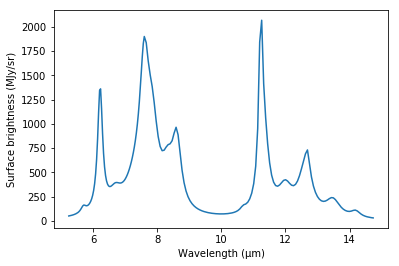

In [41]:
plt.plot(df['wavelength'], df['surface brightness'])
plt.xlabel('Wavelength (μm)')
plt.ylabel('Surface brightness (MJy/sr)')

We see that it is a reasonably smooth spectrum composed of Spitzer/IRS
observations using the SL module (SL1 and SL2, covering ~5-14 microns approximately).

The data needs to be monotonic, i.e. not double-valued or out of order (as determined by the wavelength array).

In [42]:
def strictly_increasing(L):
    return all(x < y for x, y in zip(L, L[1:]))

strictly_increasing(wave)

True

***

## <font color=blue>Step 3</font>: Running pyPAHdb (short version) <a name="step3"></a>

### 1. Instantiate an ``observation`` object <a name="step3a"></a>

All that's needed is the path to the text file above.
** can it accept both space and CSV files ???? **

In [8]:
observation = pypahdb.observation(data_file)

In [9]:
observation.file_path

'/home/koma/Documents/GitHub/pyPAHdb/pypahdb/data/sample_data_NGC7023-NW-PAHs.txt'

Now we have an ``observation`` object that encapsulates our data.

### 2. Pass the spectrum to ``decomposer`` <a name="step3b"></a>

Now with our ``observation`` instance, we simply pass its spectrum to the pyPAHdb ``decomposer``, which will perform the decomposition by PAH.

In [12]:
result = pypahdb.decomposer(observation.spectrum)

Now we have a ``decomposer`` object that encapsulates the fit.

### 3. Plot and save the results using ``writer`` <a name="step3c"></a>

``pypahdb.writer`` is a convenient way to view and save your results.

In [14]:
# write results to file
# by default, will save PDF and FITS files; can turn off with save_pdf=False as an argument.
# by default, saves output to the directory containing the input file;
# can instead save to a user-defined directory by setting output_directory.
# e.g., output_directory='' will save to the local folder.
pypahdb.writer(result);

Saved:  /home/koma/Documents/GitHub/pyPAHdb/pypahdb/data/sample_data_NGC7023-NW-PAHs_pypahdb.pdf
Saved:  /home/koma/Documents/GitHub/pyPAHdb/pypahdb/data/sample_data_NGC7023-NW-PAHs_pypahdb.fits


<Figure size 432x288 with 0 Axes>

***

## <span style="color:blue">Step 3</span>: Running pyPAHdb (long version with details) <a name="step3b"></a>

### 1. Instantiate an ``observation`` object

All that's needed is the path to the text file above.
** can it accept both space and CSV files ???? **

In [32]:
observation = pypahdb.observation(data_file)

Now we have an ``observation`` object that encapsulates our data.

In [34]:
observation.file_path

'NGC7023-NW-PAHs.txt'

The wavelength array is contained within ``observation.spectrum.abscissa``.

In [46]:
type(observation.spectrum.abscissa)

numpy.ndarray

In [45]:
observation.spectrum.abscissa[:10]

array([5.24282, 5.2738 , 5.30479, 5.33577, 5.36676, 5.39774, 5.42873,
       5.45971, 5.4907 , 5.52169])

In [47]:
observation.spectrum.abscissa.shape

(194,)

The flux array is within ``observation.spectrum.ordinate``.

In [42]:
type(observation.spectrum.ordinate)

numpy.ndarray

In [43]:
observation.spectrum.ordinate.shape

(194, 1, 1)

### 2. Pass the spectrum to ``decomposer``

Now with our ``observation`` instance, we simply pass its spectrum to the pyPAHdb ``decomposer``, which will perform the decomposition by PAH.

** seems like you shouldn't need to specify observation.spectrum?? just observation? or...? **

In [48]:
result = pypahdb.decomposer(observation.spectrum)

In [49]:
type(result)

pypahdb.decomposer.decomposer

In [51]:
type(result.charge)

dict

In [53]:
type(result.fit)

numpy.ndarray

In [54]:
type(result.ionized_fraction)

numpy.ndarray

In [55]:
type(result.large_fraction)

numpy.ndarray

In [56]:
type(result.norm)

numpy.ndarray

In [57]:
type(result.size)

dict

In [58]:
type(result.spectrum)

pypahdb.spectrum.spectrum